In [76]:
import pandas as pd
import numpy as np
import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import math
import seaborn as sns
import itertools

Read in data

In [3]:
results_1 = pd.read_csv('experiment_1_t_sep_results.csv')
results_3 = pd.read_csv('experiment_3_t_sep_results.csv')

wish_results_1 = pd.read_csv('wishart_experiment_1_t_sep_results.csv')
wish_results_3 = pd.read_csv('wishart_experiment_3_t_sep_results.csv')

Some helper functions

In [5]:
def sens_and_spec(df):
    sensitivity = df['truepos'] / (df['truepos'] + df['falseneg'])
    specificity = df['trueneg'] / (df['trueneg'] + df['falsepos'])

    sensitivity[np.isnan(sensitivity)] = 0
    specificity[np.isnan(specificity)] = 0
    return(sensitivity, specificity)

def KME_mean(df):
    df_mean = df.groupby(['b','d','KME','E','K','n_samples','n_distributions']).mean()
    df_mean.insert(1, 'acc_std', df.groupby(['b','d','KME','E','K','n_samples','n_distributions'])[['score']].std())
    df_mean = df_mean.reset_index()
    return(df_mean)

def wish_mean(df):
    df_mean = df.groupby(['b','d','n_samples']).mean()
    df_mean.insert(2, 'acc_std', df.groupby(['b','d','n_samples'])[['accuracy']].std())
    df_mean = df_mean.reset_index()
    return(df_mean)
    
    

Import KME results in correct format and extract true positive and false positive rates.

In [66]:
results_1_mean = KME_mean(results_1)

sensitivity_1, specificity_1 = sens_and_spec(results_1_mean)

results_1_mean['sens'] = sensitivity_1
results_1_mean['spec'] = specificity_1

#print(results_mean.reset_index().to_markdown())

In [67]:
results_3_mean = KME_mean(results_3)

sensitivity_3, specificity_3 = sens_and_spec(results_3_mean)

results_3_mean['sens'] = sensitivity_3
results_3_mean['spec'] = specificity_3

Import Wishart results in correct format and extract true positive and false positive rates.

In [8]:
wish_results_lin_1 = wish_results_1[wish_results_1['linear'] == True] 
wish_results_nonlin_1 = wish_results_1[wish_results_1['linear'] == False] 

wish_results_lin_1_mean = wish_mean(wish_results_lin_1)
wish_results_nonlin_1_mean = wish_mean(wish_results_nonlin_1)

sensitivity_wish_lin_1, specificity_wish_lin_1 = sens_and_spec(wish_results_lin_1_mean)
sensitivity_wish_nonlin_1, specificity_wish_nonlin_1 = sens_and_spec(wish_results_nonlin_1_mean)


In [9]:
wish_results_lin_3 = wish_results_3[wish_results_3['linear'] == True] 
wish_results_nonlin_3 = wish_results_3[wish_results_3['linear'] == False] 

wish_results_lin_3_mean = wish_mean(wish_results_lin_3)
wish_results_nonlin_3_mean = wish_mean(wish_results_nonlin_3)

sensitivity_wish_lin_3, specificity_wish_lin_3 = sens_and_spec(wish_results_lin_3_mean)
sensitivity_wish_nonlin_3, specificity_wish_nonlin_3 = sens_and_spec(wish_results_nonlin_3_mean)


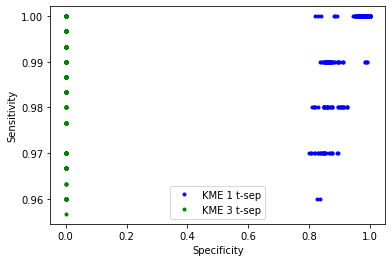

In [10]:
plt.plot(specificity_1,sensitivity_1, 'b.',label='KME 1 t-sep')    
plt.plot(specificity_3, sensitivity_3, 'g.',label='KME 3 t-sep')
#plt.plot([0,1],'k')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.legend()

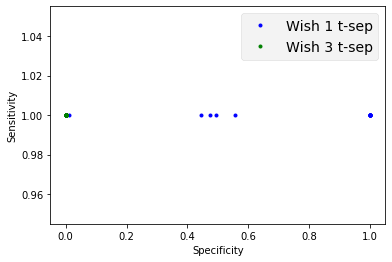

In [11]:
plt.plot(specificity_wish_nonlin_1,sensitivity_wish_nonlin_1, 'b.',label='Wish 1 t-sep')    
plt.plot(specificity_wish_nonlin_3, sensitivity_wish_nonlin_3, 'g.',label='Wish 3 t-sep')
plt.style.use('fivethirtyeight')
#plt.plot([0,1],'k')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.legend()

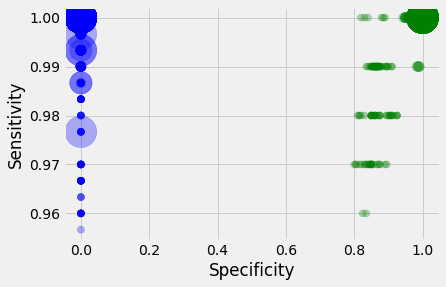

In [12]:
plt.scatter(specificity_1,sensitivity_1, c='g', s=(results_1_mean.reset_index()['n_samples']), alpha=0.3)
plt.scatter(specificity_3,sensitivity_3, c='b', s=(results_3_mean.reset_index()['n_samples']), alpha=0.3)
plt.style.use('fivethirtyeight')

plt.xlabel('Specificity')
plt.ylabel('Sensitivity')

#plt.legend()
plt.show()

Text(0, 0.5, 'Sensitivity')

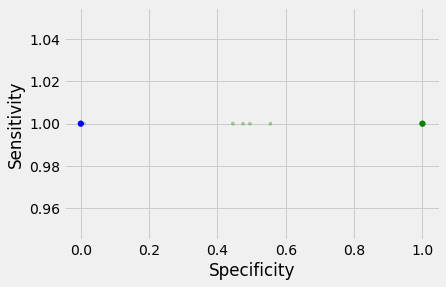

In [13]:
plt.scatter(specificity_wish_nonlin_1,sensitivity_wish_nonlin_1, c='g', s=np.sqrt(wish_results_nonlin_1_mean.reset_index()['n_samples']), alpha=0.3)
plt.scatter(specificity_wish_nonlin_3,sensitivity_wish_nonlin_3, c='b', s=np.sqrt(wish_results_nonlin_3_mean.reset_index()['n_samples']), alpha=0.3)
plt.style.use('fivethirtyeight')

plt.xlabel('Specificity')
plt.ylabel('Sensitivity')

#plt.legend()

In [83]:
def plot_nsamples_sns_combinations(df):
    fig, axs = plt.subplots(3,3, sharex=True, sharey=True, figsize=(12,12))
    #fig.subplots_adjust(hspace = 1.2, wspace=1.2)

    axs = axs.ravel()
    
    combinations = itertools.product(df['K'].unique(), df['n_distributions'].unique())

    for n, comb in enumerate(combinations):
        K, n_dist = comb
        new_df = df[(df['K'] == K) & (df['n_distributions'] == n_dist)]
        sens, spec = sens_and_spec(new_df)

        sns.scatterplot(x=spec, y=sens, ax=axs[n], hue=new_df['n_samples'], palette="tab10")
        axs[n].set_title('W: {} and n_dist: {}'.format(K, n_dist))
        axs[n].set(xlabel = 'Specificity', ylabel = 'Sensitivity')
        axs[n].set_xlim([-0.02,0.02])
        axs[n].set_ylim([0.95,1.02])

        plt.xlabel('Specificity')
        plt.ylabel('Sensitivity')
    
    plt.style.use('fivethirtyeight')

    plt.show

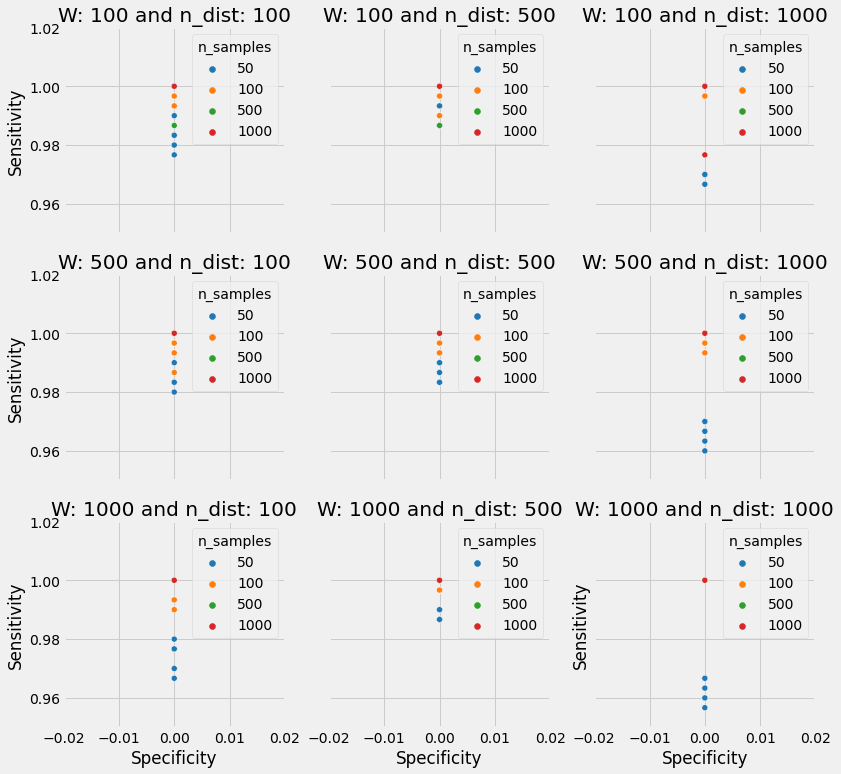

In [84]:
plot_nsamples_sns_combinations(results_3_mean)

### Plotting multiple graphs based on sample size

In [14]:
wish_1_samp = wish_results_nonlin_1.groupby('n_samples').reset_index()
KME_1_samp = results_1_mean.groupby('n_samples').reset_index()


AttributeError: 'DataFrameGroupBy' object has no attribute 'reset_index'

In [15]:
wish_results_nonlin_1_mean

,b,d,n_samples,linear,accuracy,acc_std,trueneg,falseneg,truepos,falsepos,model_count
0,0.01,0.01,50,False,0.333333,0.000000,0.00,0.0,1.0,2.00,0.0
1,0.01,0.01,100,False,0.630000,0.313894,0.89,0.0,1.0,1.11,0.0
2,0.01,0.01,500,False,1.000000,0.000000,2.00,0.0,1.0,0.00,0.0
3,0.01,0.01,1000,False,1.000000,0.000000,2.00,0.0,1.0,0.00,0.0
4,0.01,0.05,50,False,0.333333,0.000000,0.00,0.0,1.0,2.00,0.0
5,0.01,0.05,100,False,0.703333,0.320966,1.11,0.0,1.0,0.89,0.0
6,0.01,0.05,500,False,1.000000,0.000000,2.00,0.0,1.0,0.00,0.0
7,0.01,0.05,1000,False,1.000000,0.000000,2.00,0.0,1.0,0.00,0.0
8,0.05,0.01,50,False,0.340000,0.066667,0.02,0.0,1.0,1.98,0.0
9,0.05,0.01,100,False,0.663333,0.312461,0.99,0.0,1.0,1.01,0.0


### Plot 4 graphs displaying the scores for different sample sizes

In [64]:
def plot_nsamples_sns(df):
    fig, axs = plt.subplots(2,2, sharex=True, sharey=True, figsize=(8,8))
    #fig.subplots_adjust(hspace = 1.2, wspace=1.2)

    axs = axs.ravel()

    for n, samples in enumerate(df['n_samples'].unique()):
        sens, spec = sens_and_spec(df[df['n_samples'] == samples])

        sns.scatterplot(x=spec, y=sens, ax=axs[n])
        axs[n].set_title('Sample size {}'.format(samples))
        axs[n].set(xlabel = 'Specificity', ylabel = 'Sensitivity')
        axs[n].set_xlim([-0.05,1.05])
        axs[n].set_ylim([-0.05,1.05])

        plt.xlabel('Specificity')
        plt.ylabel('Sensitivity')
    
    plt.style.use('fivethirtyeight')

    plt.show
    
def plot_nsamples_sns_colors(df):
    fig, axs = plt.subplots(2,2, sharex=False, sharey=False, figsize=(12,12))
    #fig.subplots_adjust(hspace = 1.2, wspace=1.2)

    axs = axs.ravel()

    for n, samples in enumerate(df['n_samples'].unique()):
        new_df = df[(df['n_samples'] == samples) & (df['b'] == 0.01) & (df['d'] == 0.01)]
        sens, spec = sens_and_spec(new_df)

        sns.scatterplot(x=spec, y=sens, ax=axs[n],hue=new_df['n_distributions'])
        axs[n].set_title('Sample size {}'.format(samples))
        axs[n].set(xlabel = 'Specificity', ylabel = 'Sensitivity')
        #axs[n].set_xlim([-0.05,1.05])
        #axs[n].set_ylim([-0.05,1.05])

        plt.xlabel('Specificity')
        plt.ylabel('Sensitivity')
    
    plt.style.use('fivethirtyeight')

    plt.show
    
# def plot_nsamples(df):
#     fig, axs = plt.subplots(2,2, sharex=True, sharey=True, figsize=(8,8))
#     #fig.subplots_adjust(hspace = 1.2, wspace=1.2)

#     axs = axs.ravel()

#     for n, samples in enumerate(df['n_samples'].unique()):
#         sens, spec = sens_and_spec(df[df['n_distributions'] == samples])

#         axs[n].scatter(spec, sens, c='r')
#         axs[n].set_title('Sample size {}'.format(samples))
#         axs[n].set(xlabel = 'Specificity', ylabel = 'Sensitivity')
#         #axs[n].set_xlim([0,1])
#         axs[n].set_ylim([0,1])

#         plt.xlabel('Specificity')
#         plt.ylabel('Sensitivity')
    
#     plt.style.use('fivethirtyeight')

#     plt.show

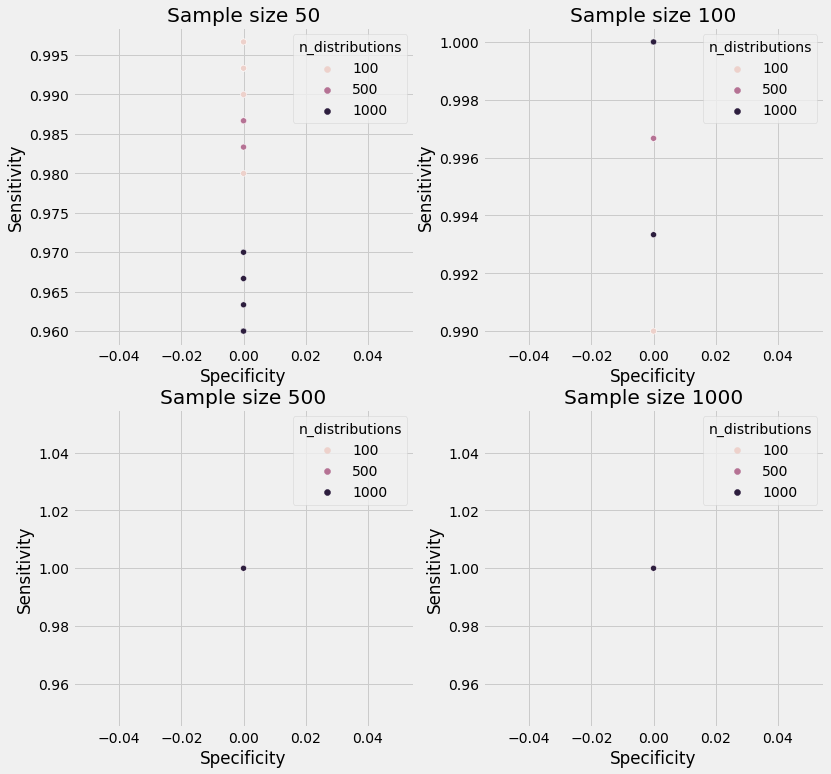

In [65]:
plot_nsamples_sns_colors(results_3_mean)

In [27]:
results_3_mean[results_3_mean['n_samples'] == 100]

,b,d,KME,E,K,n_samples,n_distributions,score,acc_std,trueneg,falseneg,truepos,falsepos
3,0.01,0.01,4,100,100,100,100,0.993333,0.046902,0.0,0.02,2.98,0.0
4,0.01,0.01,4,100,100,100,500,0.996667,0.033333,0.0,0.01,2.99,0.0
5,0.01,0.01,4,100,100,100,1000,1.000000,0.000000,0.0,0.00,3.00,0.0
15,0.01,0.01,4,100,500,100,100,0.996667,0.033333,0.0,0.01,2.99,0.0
16,0.01,0.01,4,100,500,100,500,0.993333,0.046902,0.0,0.02,2.98,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,0.05,0.05,4,1000,500,100,500,0.996667,0.033333,0.0,0.01,2.99,0.0
413,0.05,0.05,4,1000,500,100,1000,0.996667,0.033333,0.0,0.01,2.99,0.0
423,0.05,0.05,4,1000,1000,100,100,0.990000,0.074234,0.0,0.03,2.97,0.0
424,0.05,0.05,4,1000,1000,100,500,0.996667,0.033333,0.0,0.01,2.99,0.0


In [71]:
results_3_mean.columns

Index(['b', 'd', 'KME', 'E', 'K', 'n_samples', 'n_distributions', 'score',
       'acc_std', 'trueneg', 'falseneg', 'truepos', 'falsepos', 'sens',
       'spec'],
      dtype='object')

In [73]:
results_3_mean[['b','d','E','K','n_samples','n_distributions','sens']].cov()

,b,d,E,K,n_samples,n_distributions,sens
b,4.009281e-04,-6.439809e-20,5.934928e-15,4.055534e-15,-1.652616e-17,-2.866986e-16,-0.000003
d,-6.439809e-20,4.009281e-04,-1.714535e-15,-2.077225e-15,-1.207464e-19,-2.830888e-16,-0.000012
E,5.934928e-15,-1.714535e-15,1.358701e+05,2.093315e-12,-2.701052e-13,3.794837e-13,0.049755
K,4.055534e-15,-2.077225e-15,2.093315e-12,1.358701e+05,-1.304101e-12,7.867516e-13,-0.162929
n_samples,-1.652616e-17,-1.207464e-19,-2.701052e-13,-1.304101e-12,1.458063e+05,7.427892e-13,2.180298
n_distributions,-2.866986e-16,-2.830888e-16,3.794837e-13,7.867516e-13,7.427892e-13,1.358701e+05,-0.515597
sens,-2.629544e-06,-1.191029e-05,4.975509e-02,-1.629286e-01,2.180298e+00,-5.155968e-01,0.000109


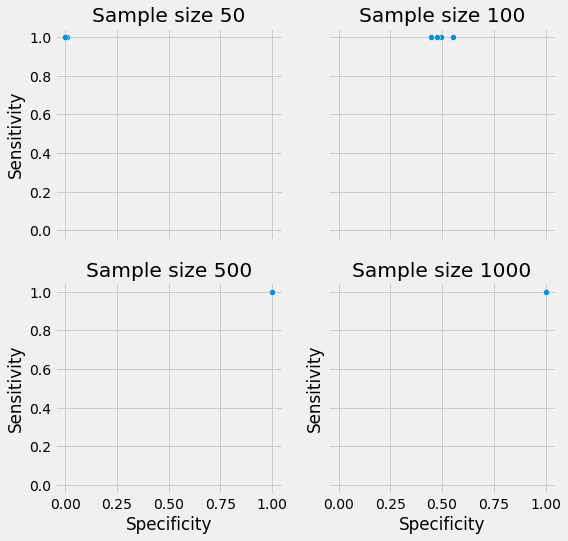

In [82]:
plot_nsamples_sns(wish_results_nonlin_1_mean)

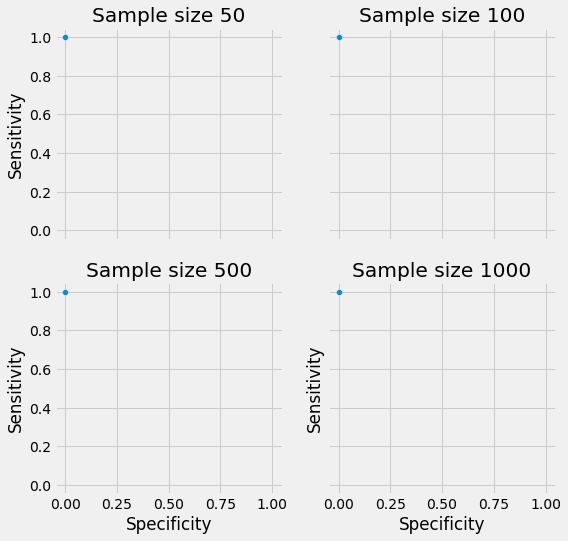

In [83]:
plot_nsamples_sns(wish_results_nonlin_3_mean)

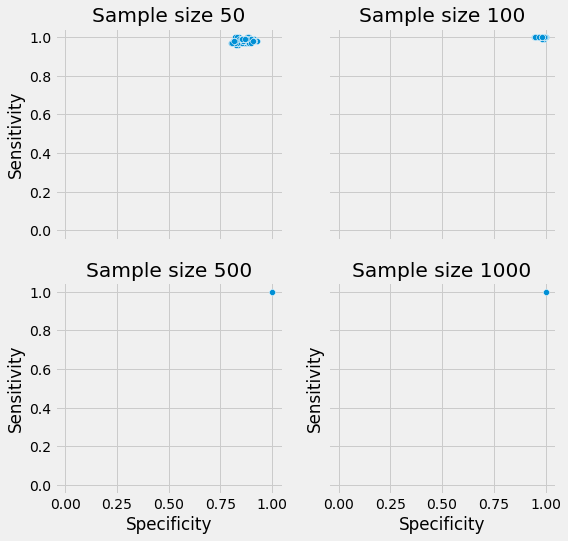

In [84]:
plot_nsamples_sns(results_1_mean)

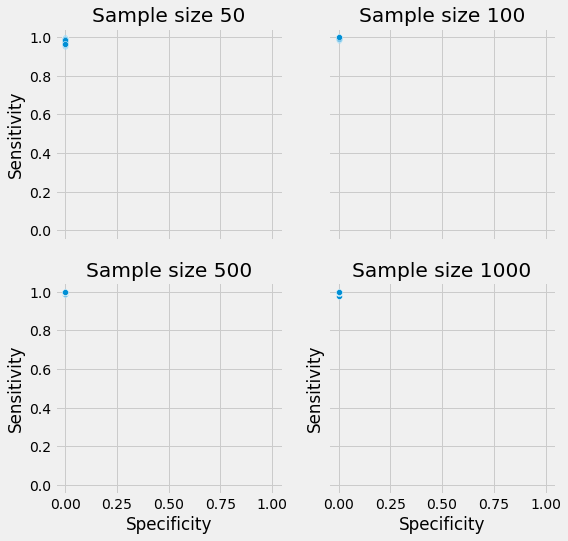

In [86]:
plot_nsamples_sns(results_3_mean)

### Graph displaying the True Positive Rate and False Positive Rate of the KME and Wishart test with different hyperparameters

In [92]:
plt.plot(false_pos,true_pos, 'r.',label='KME')    
#plt.plot(false_pos_wish_nonlin, true_pos_wish_nonlin, 'g.',label='Wishart')
#plt.plot(false_pos_wish_lin,true_pos_wish_lin,'b.', label='lin Wishart')
plt.plot([0,1],'k')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.legend()

NameError: name 'false_pos' is not defined

In [91]:
def plot_nsamples_sns_colors_adj(df):
    fig, axs = plt.subplots(2,2, sharex=False, sharey=False, figsize=(12,12))
    #fig.subplots_adjust(hspace = 1.2, wspace=1.2)

    axs = axs.ravel()

    for n, samples in enumerate(df['n_samples'].unique()):
        new_df = df[(df['n_samples'] == samples)]
        sens, spec = sens_and_spec(new_df)

        sns.scatterplot(x=spec, y=sens, ax=axs[n],hue=new_df['n_distributions'], palette="tab10")
        axs[n].set_title('Sample size {}'.format(samples))
        axs[n].set(xlabel = 'Specificity', ylabel = 'Sensitivity')
        axs[n].set_xlim([-0.05,0.05])
        axs[n].set_ylim([0.95,1.01])

        plt.xlabel('Specificity')
        plt.ylabel('Sensitivity')
    
    plt.style.use('fivethirtyeight')

    plt.show

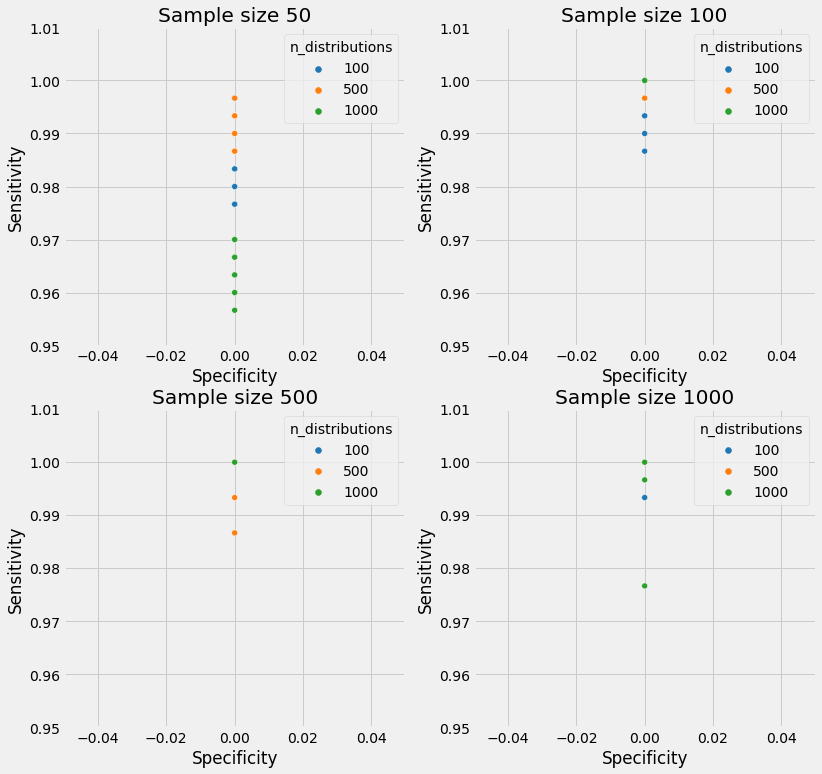

In [92]:
plot_nsamples_sns_colors_adj(results_3_mean)